# The Business Case:
Let's try to forecast the sales for the next days based on features of a historical dataset, taking into account seasonality effects,demand,holidays,promotions and competitions.

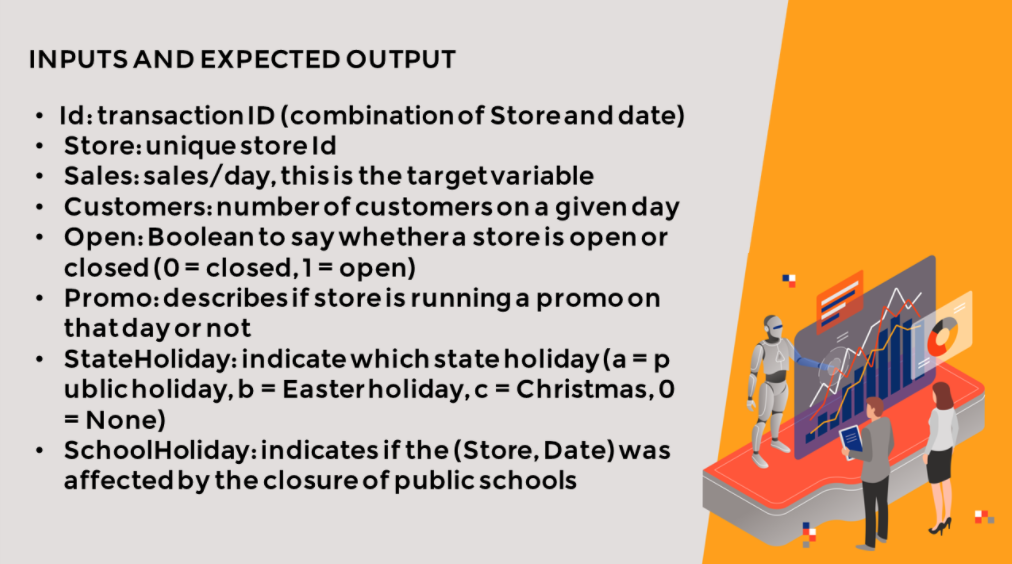

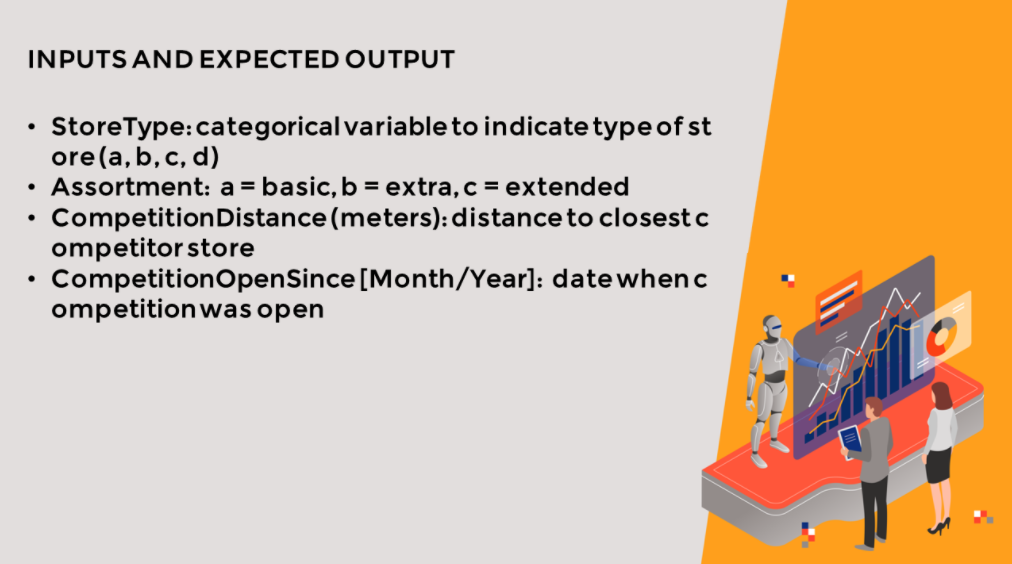

# Importing Libraries


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [24]:
store_data = pd.read_csv('store.csv',error_bad_lines= False)
train_data = pd.read_csv('train.csv', error_bad_lines= False)

b'Skipping line 27843: expected 9 fields, saw 10\n'
b'Skipping line 112012: expected 9 fields, saw 14\n'
b'Skipping line 140167: expected 9 fields, saw 10\nSkipping line 196218: expected 9 fields, saw 10\n'
b'Skipping line 280672: expected 9 fields, saw 13\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193841 entries, 0 to 1193840
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1193841 non-null  int64  
 1   DayOfWeek      1193840 non-null  float64
 2   Date           1193840 non-null  object 
 3   Sales          1193838 non-null  float64
 4   Customers      1193838 non-null  float64
 5   Open           1193838 non-null  float64
 6   Promo          1193838 non-null  float64
 7   StateHoliday   1193838 non-null  object 
 8   SchoolHoliday  1193838 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 82.0+ MB


In [26]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0


In [27]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [28]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.193841e+06,1.193840e+06,1.193838e+06,1.193838e+06,1.193838e+06,1.193838e+06,1.193838e+06
mean,5.584975e+02,3.998167e+00,5.736761e+03,6.309648e+02,8.293328e-01,3.809872e-01,1.720125e-01
std,3.219433e+02,1.998183e+00,3.836748e+03,4.639082e+02,3.762181e-01,4.856296e-01,3.773914e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.692000e+03,4.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.708000e+03,6.080000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.814000e+03,8.350000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [29]:
store_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [30]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# Cleaning the Data

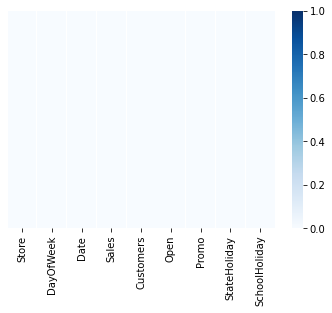

In [31]:
sns.heatmap(train_data.isnull(),yticklabels = False,cmap = 'Blues')

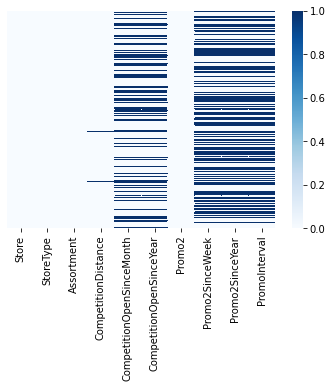

In [32]:
sns.heatmap(store_data.isnull(),yticklabels = False,cmap = 'Blues')

In [34]:
store_data[store_data['Promo2'] ==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [35]:
str_cols = ['Promo2SinceWeek','Promo2SinceYear', 'PromoInterval','CompetitionOpenSinceYear','CompetitionOpenSinceMonth']

In [36]:
for st in str_cols:
  store_data[st].fillna(0,inplace = True)

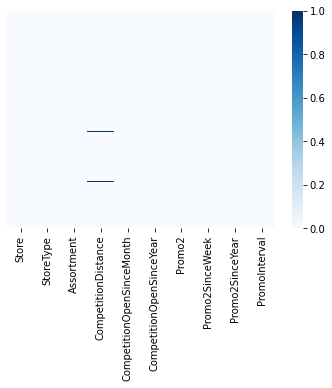

In [37]:
sns.heatmap(store_data.isnull(),yticklabels = False,cmap = 'Blues')

In [38]:
store_data["CompetitionDistance"].fillna(store_data['CompetitionDistance'].mean(),inplace = True)

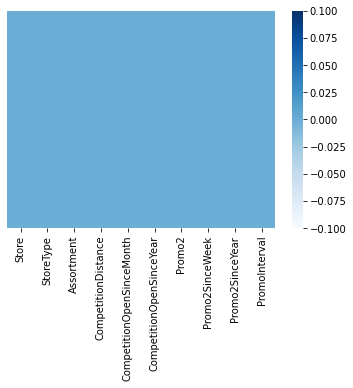

In [39]:
sns.heatmap(store_data.isnull(),yticklabels = False,cmap = 'Blues')

# Train the Model

In [45]:
from fbprophet import Prophet

In [55]:
def sales_prediction(Store_ID,sales,period):
  sales = sales[sales['Store'] == Store_ID]
  sales = sales[['Date','Sales']].rename(columns = {'Date':'ds','Sales':'y'})
  sales = sales.sort_values('ds')
  model = Prophet()
  model.fit(sales)
  future = model.make_future_dataframe(periods = period)
  forecast = model.predict(future)
  figure = model.plot(forecast,xlabel = 'Date', ylabel = 'Sales')
  figure2 = model.plot_components(forecast)

  return sales

Let's predict the sales date for the next month

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y
1192736,2013-01-01,0.0
315852,2013-01-01,0.0
314737,2013-01-02,4812.0
1191621,2013-01-02,4812.0
313622,2013-01-03,4675.0
...,...,...
4469,2015-07-27,7212.0
3354,2015-07-28,6140.0
2239,2015-07-29,5524.0
1124,2015-07-30,6186.0


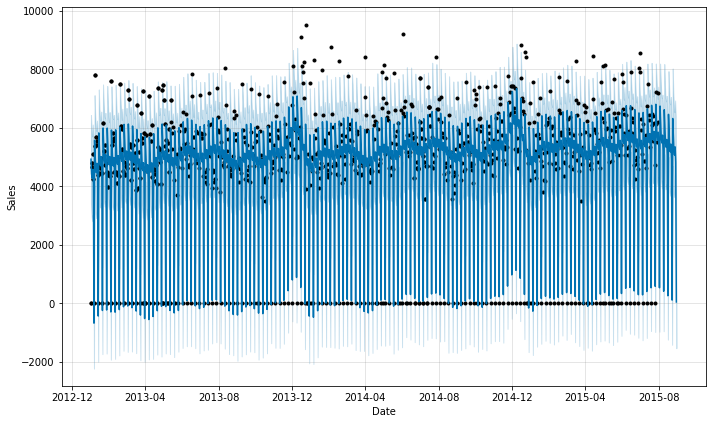

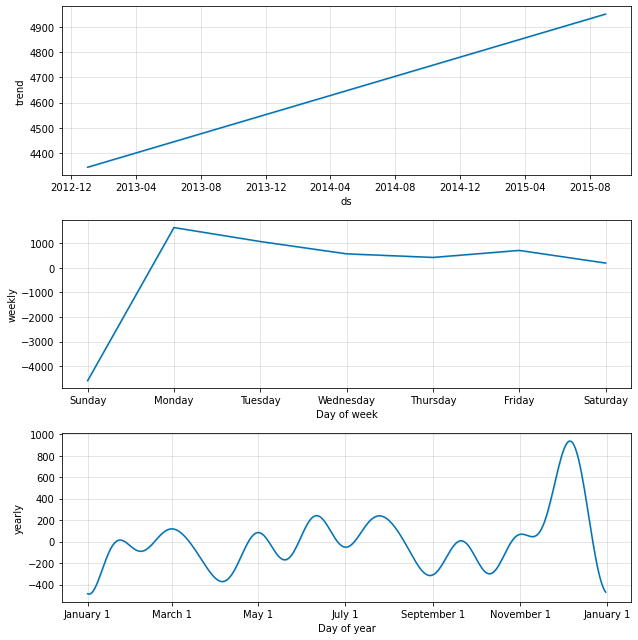

In [59]:
sales_prediction(10,train_data,30)